In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

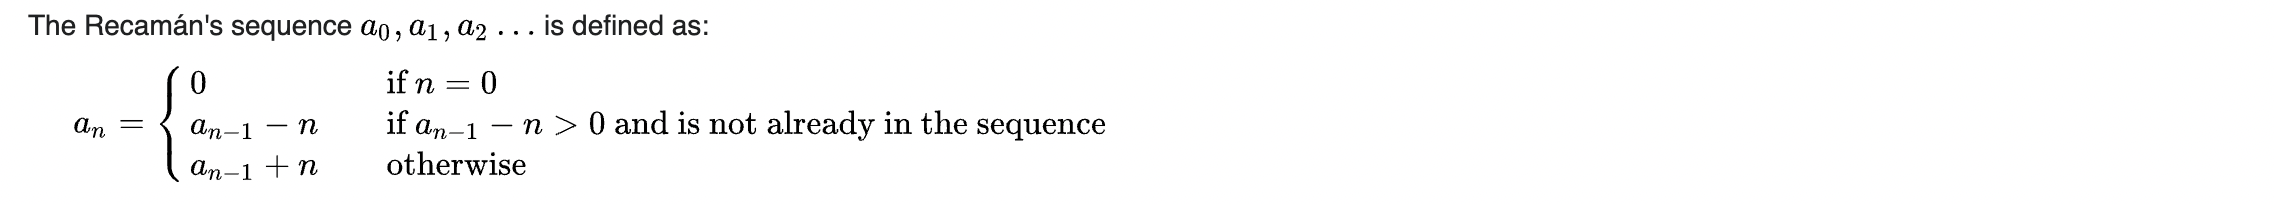

In [4]:
# Now , Let's Define it 
n = 201
aa = [0]
for i in range(1, n):
    t1 = aa[-1] - i
    t2 = aa[-1] + i
    if (t1 > 0) * (t1 not in aa):
        aa.append(t1)
    else:
        aa.append(t2)

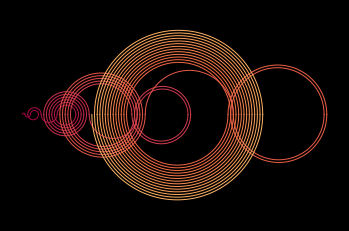

In [5]:
#  Lets bring some art on!!!!!! 
def add_to_plot(i):
    # Arc centre and radius.
    c, r = (aa[i+1] + aa[i]) / 2, abs(aa[i+1] - aa[i]) / 2
    x = np.linspace(-r, r, 1000)
    y = np.sqrt(r**2 - x**2) * (-1)**i
    color = cm(i/n)
    ax.plot(x+c, y, c=color, lw=1)
# Equal aspect ratio Figure with black background and no axes.
fig, ax = plt.subplots(facecolor='k')
ax.axis('equal')
ax.axis('off')

# Colour the lines sequentially from a Matplotlib colormap.
cm = plt.cm.get_cmap('Spectral')

for i in range(0, 66-2):
    add_to_plot(i)

plt.savefig('recaman.png', dpi=300
)

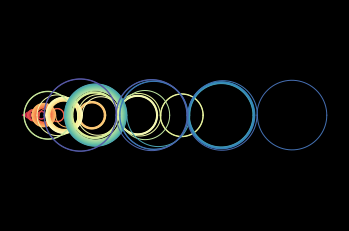

In [6]:
def animate(i):
    # Arc centre and radius.
    c, r = (aa[i+1] + aa[i]) / 2, abs(aa[i+1] - aa[i]) / 2
    x = np.linspace(-r, r, 1000)
    y = np.sqrt(r**2 - x**2) * (-1)**i
    color = cm(i/n)
    ax.plot(x+c, y, c=color, lw=1)
    
# Equal aspect ratio Figure with black background and no axes.
fig, ax = plt.subplots(facecolor='k')
ax.axis('equal')
ax.axis('off')

ani = animation.FuncAnimation(fig, animate, frames=n-2, interval=50)
ani.save('Recamans.gif',writer='pillow',fps=1/0.3, dpi=200)

In [7]:
from scipy.io import wavfile
from IPython.display import Audio
def get_piano_freq(n):
    return 2**((n-49)/12) *440
# Pentatonic
freqs = np.array([65.41, 73.42, 82.41, 98, 110, 130.81, 
                       146.83, 164.81, 196, 220, 261.63, 293.66, 329.63,
                       392, 440, 523.25, 587.33, 659.25, 783.99])

# Minor Blues
freqs = np.array([65.41, 77.78, 87.31, 92.5, 98, 116.54, 130.81, 155.56, 
                 174.61, 185, 196, 233.06, 261.63, 311.13, 349.23,
                  369.99, 392, 466.16, 523.25, 622.25, 698.46, 783.99
                 ])

# Chromatic
freqs = np.array([get_piano_freq(n) for n in range(40)])
max_freq = 400
sr = 2*4096   # sample rate corresponding to one sec
ns = 0.2  # length of tone in sec
dd = []
for i in range(n):
    f1 = freqs[aa[i]%len(freqs)]
    x1= np.linspace(0, ns*2*np.pi*f1, int(ns*sr))
    signal = np.sum(np.array([(1/(1.7)**i) * np.sin(i*x1) for i in range(10)]), axis=0)
    dd.append(signal)
dd = np.array(dd).ravel()
wavfile.write('recaman_chrom2.wav',sr,dd.astype('float32'))
Audio('recaman_chrom2.wav')